# Weather Forecast Using  pyown
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
pyown is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1 Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [15]:
# import libraries
from pyowm import OWM
import pyowm
import pandas as pd
import seaborn as sns

In [16]:
# Set API key
owm = OWM('XXX')

In [17]:
# Define the default parameters
city = 'Sao Paulo,BR'

In [18]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [19]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [20]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [21]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [22]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [23]:
df.head()

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-02 21:00:00+00:00,15,67,16.12,19.10,16.12,few clouds,http://openweathermap.org/img/w/02d.png,0.0
1,2019-12-03 00:00:00+00:00,51,74,15.50,17.74,15.50,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2,2019-12-03 03:00:00+00:00,98,76,15.45,16.94,15.45,overcast clouds,http://openweathermap.org/img/w/04n.png,0.0
3,2019-12-03 06:00:00+00:00,88,77,15.42,16.17,15.42,overcast clouds,http://openweathermap.org/img/w/04n.png,0.0
4,2019-12-03 09:00:00+00:00,75,80,15.71,15.71,15.71,broken clouds,http://openweathermap.org/img/w/04d.png,0.0


In [24]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
datetime,,,,,,
2019-12-02 00:00:00+00:00,15.000000,67.000000,16.120000,19.100000,16.120000,0.0000
2019-12-03 00:00:00+00:00,77.875000,68.875000,18.456250,19.016250,18.456250,0.0000
2019-12-04 00:00:00+00:00,62.750000,65.875000,22.281250,22.281250,22.281250,0.1725
2019-12-05 00:00:00+00:00,93.000000,67.500000,24.540000,24.540000,24.540000,0.1175
2019-12-06 00:00:00+00:00,94.500000,77.375000,20.276250,20.276250,20.276250,1.1025
2019-12-07 00:00:00+00:00,83.714286,65.142857,20.542857,20.542857,20.542857,0.0000


In [26]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,,
2019-12-02 00:00:00+00:00,2019-12-02 21:00:00+00:00,15,67,16.12,19.10,16.12,few clouds,http://openweathermap.org/img/w/02d.png,0.00
2019-12-03 00:00:00+00:00,2019-12-03 21:00:00+00:00,100,80,23.89,23.89,23.89,scattered clouds,http://openweathermap.org/img/w/04n.png,0.00
2019-12-04 00:00:00+00:00,2019-12-04 21:00:00+00:00,99,82,29.79,29.79,29.79,overcast clouds,http://openweathermap.org/img/w/10d.png,0.94
2019-12-05 00:00:00+00:00,2019-12-05 21:00:00+00:00,100,79,28.03,28.03,28.03,overcast clouds,http://openweathermap.org/img/w/10d.png,0.69
2019-12-06 00:00:00+00:00,2019-12-06 21:00:00+00:00,100,84,23.78,23.78,23.78,overcast clouds,http://openweathermap.org/img/w/10n.png,4.94
2019-12-07 00:00:00+00:00,2019-12-07 18:00:00+00:00,100,84,26.42,26.42,26.42,scattered clouds,http://openweathermap.org/img/w/04n.png,0.00


In [27]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,,
2019-12-02 00:00:00+00:00,2019-12-02 21:00:00+00:00,15,67,16.12,19.10,16.12,few clouds,http://openweathermap.org/img/w/02d.png,0.0
2019-12-03 00:00:00+00:00,2019-12-03 00:00:00+00:00,26,54,15.42,15.71,15.42,broken clouds,http://openweathermap.org/img/w/03d.png,0.0
2019-12-04 00:00:00+00:00,2019-12-04 00:00:00+00:00,14,42,17.20,17.20,17.20,broken clouds,http://openweathermap.org/img/w/02d.png,0.0
2019-12-05 00:00:00+00:00,2019-12-05 00:00:00+00:00,66,54,22.23,22.23,22.23,broken clouds,http://openweathermap.org/img/w/04d.png,0.0
2019-12-06 00:00:00+00:00,2019-12-06 00:00:00+00:00,60,64,18.14,18.14,18.14,broken clouds,http://openweathermap.org/img/w/04d.png,0.0
2019-12-07 00:00:00+00:00,2019-12-07 00:00:00+00:00,45,37,16.82,16.82,16.82,broken clouds,http://openweathermap.org/img/w/03d.png,0.0


In [28]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
datetime,,,
2019-12-02 00:00:00+00:00,16.12,16.12,16.120000
2019-12-03 00:00:00+00:00,15.42,23.89,18.456250
2019-12-04 00:00:00+00:00,17.20,29.79,22.281250
2019-12-05 00:00:00+00:00,22.23,28.03,24.540000
2019-12-06 00:00:00+00:00,18.14,23.78,20.276250
2019-12-07 00:00:00+00:00,16.82,26.42,20.542857


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

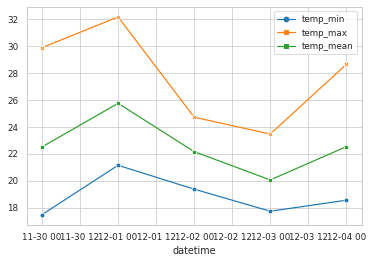

In [81]:
#sns.set_style("whitegrid")
sns.set_context("paper")

ax = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
#ax.set(xticks=[1,2,3,4,5])

In [76]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day

,rain_vol
datetime,
2019-11-30 00:00:00+00:00,2.00
2019-12-01 00:00:00+00:00,0.06
2019-12-02 00:00:00+00:00,0.00
2019-12-03 00:00:00+00:00,0.00
2019-12-04 00:00:00+00:00,4.81


In [11]:
df.set_index('datetime', drop=True, inplace=True)

In [12]:
df.head()

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
datetime,,,,,,,,
2019-11-30 00:00:00+00:00,78,79,18.01,18.61,18.01,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2019-11-30 03:00:00+00:00,71,83,17.81,18.26,17.81,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2019-11-30 06:00:00+00:00,66,86,17.49,17.79,17.49,broken clouds,http://openweathermap.org/img/w/04n.png,0.0
2019-11-30 09:00:00+00:00,59,87,17.61,17.76,17.61,broken clouds,http://openweathermap.org/img/w/04d.png,0.0
2019-11-30 12:00:00+00:00,67,63,23.53,23.53,23.53,broken clouds,http://openweathermap.org/img/w/04d.png,0.0


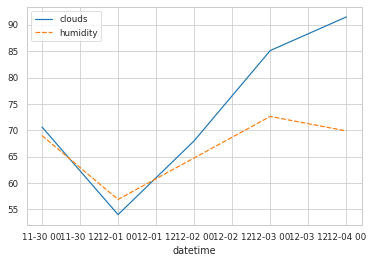

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']])
#ax2 = ax1.twinx()
#ax2 = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax2.grid(False)
plt.show()

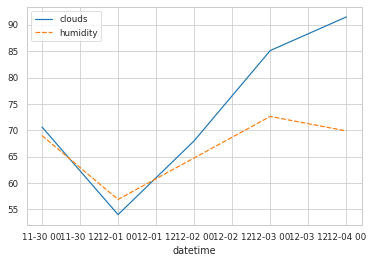

In [90]:
#ax = sns.lineplot(x=df.index, y="temp",
#                markers=True, dashes=False, data=df)
ax = sns.lineplot(data=df_mean[['clouds', 'humidity']])
#ax = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax = sns.barplot(data=df_rain_per_day)

In [22]:
df.resample('D', on='datetime').mean()


,clouds,humidity,temp,temp_max,temp_min,rain_vol
datetime,,,,,,
2019-11-30 00:00:00+00:00,70.625,69.000,22.51000,22.69750,22.51000,0.25000
2019-12-01 00:00:00+00:00,54.000,56.875,25.75000,25.75000,25.75000,0.00750
2019-12-02 00:00:00+00:00,68.000,64.750,22.16375,22.16375,22.16375,0.00000
2019-12-03 00:00:00+00:00,85.125,72.625,20.06375,20.06375,20.06375,0.00000
2019-12-04 00:00:00+00:00,91.500,69.875,22.53250,22.53250,22.53250,0.60125


TypeError: 'Text' object is not callable

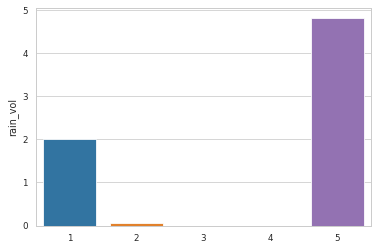

In [98]:
ax = sns.barplot(x=[1,2,3,4,5],  y="rain_vol",data=df_rain_per_day)
#ax.title("A Title") 
lot.ylabel("Survived") 
plot.xlabel("Sex") 
plot.ylim(0,100) 
plot.xlim(0,10) 
plot.setp(ax,yticks=[0,5]) 
plot.tight_layout() 

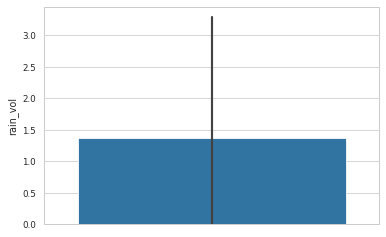

In [87]:
sns.barplot( y="rain_vol",data=df_rain_per_day)

In [96]:
sns.axes_style()


{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}